# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of GME redditors.
* Basic analysis of the network of GME redditors.

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in details.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


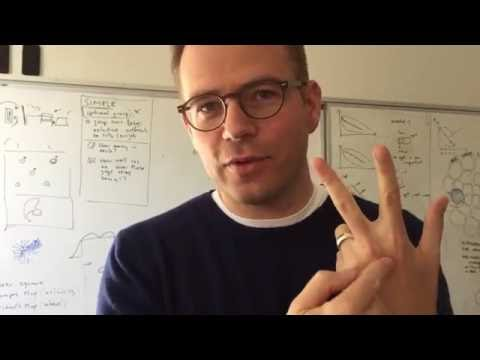

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

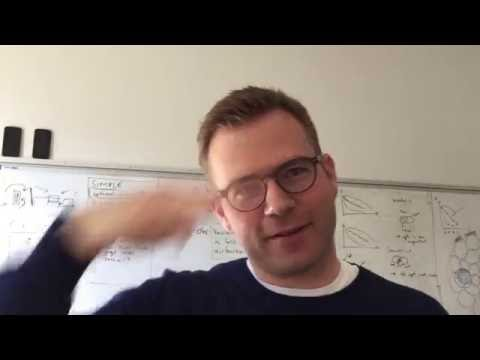

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in a Jupyter notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
> 
> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

In [ ]:
#Exercise 2.1

#you can draw a,c and d. B has to many nodes with uneven edges.

Adjecency list undricted
[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
Adjecency list dricted
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


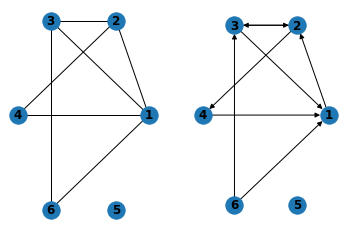

In [14]:
#Exercise 2.3
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1,4), (1,6), (2,3), (2,4), (3,6)])
G.add_node(5)
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (2,4), (3,2), (3,1), (4,1), (6,3), (6,1)])
DG.add_node(5)

#plots
plt.subplot(121)
nx.draw_shell(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(DG, with_labels=True, font_weight='bold')

#Adjecency matrices
A = nx.adjacency_matrix(G)
B = nx.adjacency_matrix(DG)
print("Adjecency list undricted")
print(A.todense())
print("Adjecency list dricted")
print(B.todense())

In [24]:
#linked list
G.edges()
DG.edges()

#clustering
print("Clustering coefficent undircted")
print(nx.average_clustering(G))
print("Clustering coefficent dircted")
print(nx.average_clustering(DG))

Clustering coefficent undircted
0.6388888888888888
Clustering coefficent dircted
0.32222222222222224


#### If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?
If we switch the labels, we will switch the rows of the matrix, aswell as the columns of the two labels.
the linked list will replace all entries of 6 with 5.

#### What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

You will not get the information on nodes which are not linked to any other nodes from the linked list, but you will from the adjecency matrix. 

#### In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

In [32]:
for path in nx.all_simple_paths(G, source=1, target=3, cutoff = 3):
     print(path)

[1, 2, 3]
[1, 3]
[1, 4, 2, 3]
[1, 6, 3]


In [40]:
len(list(nx.simple_cycles(G)))


NetworkXNotImplemented: not implemented for undirected type

### Bipartite Networks

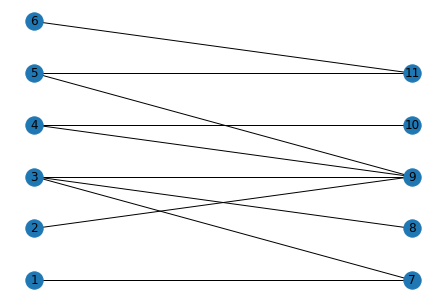

Adjecency list Bipartite
[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


In [48]:
import numpy as np
nodes = np.arange(1, 12)
edges = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)
plt.show()

A = nx.adjacency_matrix(G)
print("Adjecency list Bipartite")
print(A.todense())

# Part 3: Building the GME redditors network

Ok, enough with theory :) It is time to go back to our cool dataset it took us so much pain to download! And guess what? We will build the network of GME Redditors. Then, we will use some Network Science to study some of its properties.


> 
> *Exercise*: Build the network of Redditors discussing about GME on r\wallstreetbets. In this network, nodes correspond to authors of comments, and a direct link going from node _A_ to node _B_ exists if _A_ ever answered a submission or a comment by _B_. The weight on the link corresponds to the number of times _A_ answered _B_. You can build the network as follows:
>
> 1. Open the _comments dataset_ and the _submission datasets_ (the first contains all the comments and the second cointains all the submissions) and store them in two Pandas DataFrames.
> 2. Create three dictionaries, using the command ``dict(zip(keys,values))``, where keys and values are columns in your dataframes. The three dictionaries are the following:
>     * __comment_authors__: (_comment id_, _comment author_)
>     * __parent__:  (_comment id_ , _parent id_)
>     * __submission_authors__: (_submission id_, _submission author_)
>
> where above I indicated the (key, value) tuples contained in each dictionary.
>
> 3. Create a function that take as input a _comment id_ and outputs the author of its parent. The function does two things:
>     * First, it calls the dictionary __parent__, to find the _parent id_ of the comment identified by a given _comment id_. 
>     * Then, it finds the author of  _parent id_. 
>          * if the _parent id_ starts with "t1_", call the __comment_authors__ dictionary (for key=parent_id[3:])
>          * if the _parent id_ starts with "t3_", call the __submission_authors__ dictionars (for key=parent_id[3:])
>
> where by parent_id[3:], I mean that the first three charachters of the _parent id_ (either "t1_" or "t3_" should be ingnored).
>
> 4. Apply the function you created in step 3. to all the comment ids in your comments dataframe. Store the output in a new column, _"parent author"_, of the comments dataframe. 
> 5. For now, we will focus on the genesis of the GME community on Reddit, before all the hype started and many new redditors jumped on board. For this reason, __filter all the comments written before Dec 31st, 2020__. Also, remove deleted users by filtering all comments whose author or parent author is equal to "[deleted]". 
> 6. Create the weighted edge-list of your network as follows: consider all comments (after applying the filtering step above), groupby ("_author_", _"parent author"_) and count. 
> 7. Create a [``DiGraph``](https://networkx.org/documentation/stable//reference/classes/digraph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) to create a weighted, directed, graph starting from the edgelist you created in step 5.

In [1]:
import pandas as pd
import numpy as np

#data
comments = pd.read_csv("Data/week1/gme_reddit_posts_comments.csv", parse_dates = ["creation_date"])
submissions = pd.read_csv("Data/week1/gme_reddit_posts.csv", parse_dates = ["creation_date"])

#dictionaries
comment_authors = dict(zip(comments["comment_id"], comments["author"]))
parent = dict(zip(comments["comment_id"], comments["parent_id"]))
sub_authors = dict(zip(submissions["id"], submissions["author"]))

def get_parent_author(comment_id):
    parent_id = parent[comment_id]
    t_parent_id = parent_id[:3]
    parent_id = parent_id[3:]
    try:
        if t_parent_id == "t1_":
            return comment_authors[parent_id] #ignore the first 3 character
        elif t_parent_id == "t3_":
            return sub_authors[parent_id]
        else:
            return -1
    except KeyError:
        return -1
    
comments_new = comments
comments_new["parent_author"] = list(map(get_parent_author, comments_new["comment_id"]))
 
#remove unwanted
comments_new = comments_new[comments_new.parent_author != -1]
comments_new = comments_new[comments_new.creation_date <= "2020-12-31"]
comments_new = comments_new[comments_new.author != "[deleted]"]
comments_new = comments_new[comments_new.parent_author != "[deleted]"]    

In [2]:
comments_new.to_csv("Data/week4/comments_with_parent.csv", index= False)

In [180]:
comments_network = comments_new.groupby(["author","parent_author"]).size()
comments_network = comments_network.reset_index()
comments_network.columns = ["author", "parent_author", "weight"]
comments_network.to_csv("Data/week4/comments_network.csv", index= False)

In [189]:
import sys
import pandas as pd
#!{sys.executable} -m pip install networkx
#!{sys.executable} -m pip install scipy
import networkx as nx
import matplotlib.pyplot as plt
weigthed = pd.read_csv("Data/week4/comments_network.csv")

print(len(weigthed.parent_author.unique()))

G = nx.DiGraph()
G.add_weighted_edges_from(weigthed.values.tolist())

#nx.draw(G, with_labels=True)

16410


# Part 4: Preliminary analysis of the GME redditors network

We begin with a preliminary analysis of the network.

> 
> *Exercise: Basic Analysis of the Redditors Network*
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


Answers:

> *The reason for using a directed graph is that a undirected graph would be misleading. People are interracting with the submission, but the author may not interact back. It would look as if the author was interracting with everyone who commented if we used a undirected graph. 
> *

In [188]:
totalnodes = G.number_of_nodes()
totallinks = G.number_of_edges()
#the maximum amount of edges possible in a dircted graph is N * (N-1), where N is the amount of edges.
density = totallinks/(totalnodes * (totalnodes - 1))


print("Total number of nodes:{} \nTotal number of links:{} \nDensity of the network: {}".format(totalnodes, totallinks, density))

Total number of nodes:32225 
Total number of links:111479 
Density of the network: 0.00010735460773807552


In [52]:
list(G.in_degree())
in_degree_list = []
for i in range(len(list(G.in_degree()))):
    in_degree_list.append(list(G.in_degree())[i][1])

In [47]:
import statistics
max_value = max(in_degree_list) #2832 
min_value = min(in_degree_list) #0
average_value = sum(in_degree_list) / len(in_degree_list) #3.4593948797517458
median_value = statistics.median(in_degree_list) #1
mode = max(set(in_degree_list), key=in_degree_list.count) #0

print("Max_value: {} \nMin_Value: {} \nAverage: {} \nMedian: {} \nMode: {}".format(max_value, min_value, average_value, median_value, mode))

Max_value: 2832 
Min_Value: 0 
Average: 3.4593948797517458 
Median: 1 
Mode: 0


In [50]:
out_degree_list = []
for i in range(len(list(G.out_degree()))):
    out_degree_list.append(list(G.out_degree())[i][1])

In [51]:
#finding all the desired values
O_max_value = max(out_degree_list) #907 
O_min_value = min(out_degree_list) #0 
O_average_value = sum(out_degree_list) / len(out_degree_list) #3.4593948797517458 
O_median_value = statistics.median(out_degree_list) #1 
O_mode = max(set(out_degree_list), key=out_degree_list.count) #1

print("Max_value: {} \nMin_Value: {} \nAverage: {} \nMedian: {} \nMode: {}".format(O_max_value, O_min_value, O_average_value, O_median_value, O_mode))

Max_value: 907 
Min_Value: 0 
Average: 3.4593948797517458 
Median: 1 
Mode: 1


In [116]:
#Sorting the lists
sorted_out = sorted(out_degree_list)
sorted_in = sorted(in_degree_list)
#reversing to make the greatest values at the start
sorted_out.reverse()
sorted_in.reverse()

#initializing empty lists
top_out = []
top_in = []
authors = []

for i in range(5):
    #finding the index of the greatest redditors
    temp1 = out_degree_list.index(sorted_out[i])
    temp2 = in_degree_list.index(sorted_in[i])
    #appending the authors from the graph
    top_out.append(list(G.out_degree)[temp1])
    top_in.append(list(G.in_degree)[temp2])
    #saving the author names for later
    authors.append(list(G.out_degree)[temp1][0])
    authors.append(list(G.in_degree)[temp2][0])

print("Top redditors by out degree:", top_out)
print("Top redditors by in degree:", top_in)

Top redditors by out degree: [('WSBVoteBot', 907), ('sneakersourcerer', 579), ('Ackilles', 571), ('AutoModerator', 533), ('Stonksflyingup', 457)]
Top redditors by in degree: [('Youkiame', 2832), ('DeepFuckingValue', 2798), ('SIR_JACK_A_LOT', 1477), ('OPINION_IS_UNPOPULAR', 1468), ('rapsfan1515', 1266)]


In [126]:
author_info = []
for i in range(len(authors)):
    temp_author = authors[i] #looks at one author form the list
    temp_dataframe = comments_new.loc[comments_new['author'] == temp_author] #creating temporary dataframe only containing the author
    average_score = np.mean(temp_dataframe["score"]) #calculating their mean score
    dates_sorted = sorted(temp_dataframe["creation_date"]) #sorting the dates of posts
    joined_date = dates_sorted[0] #finding the first date
    left_date = dates_sorted[-1] #finding the last 
    author_info.append([temp_author, average_score, joined_date, left_date]) #appending to list
    
author_df = pd.DataFrame(author_info, columns=["author", "average score", "joined GME discussion", "left GME discussion"])
print(author_df)

                 author  average score joined GME discussion  \
0            WSBVoteBot       1.001590            2020-04-29   
1              Youkiame       1.666667            2020-10-09   
2      sneakersourcerer       1.641866            2020-09-20   
3      DeepFuckingValue       1.764286            2020-01-01   
4              Ackilles       3.774160            2020-09-06   
5        SIR_JACK_A_LOT      16.984375            2020-11-20   
6         AutoModerator       1.362534            2020-01-02   
7  OPINION_IS_UNPOPULAR       2.909091            2020-06-05   
8        Stonksflyingup       3.080519            2020-09-09   
9           rapsfan1515       1.254237            2020-10-10   

  left GME discussion  
0          2020-12-31  
1          2020-12-31  
2          2020-12-31  
3          2020-12-22  
4          2020-12-31  
5          2020-12-31  
6          2020-12-31  
7          2020-12-09  
8          2020-12-31  
9          2020-10-12  


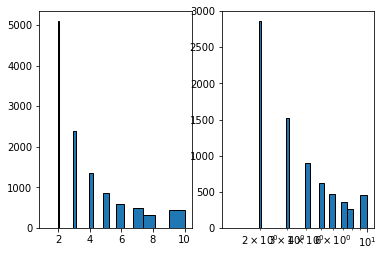

In [163]:
import numpy as np
import matplotlib.pyplot as plt
frq_out, edges_out = np.histogram(sorted_out, bins=10 ** np.logspace(np.log10(0.1),np.log10(1), 50))
frq_in, edges_in = np.histogram(sorted_in, bins=10 ** np.logspace(np.log10(0.1),np.log10(1), 50))

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(edges_out[:-1], frq_out, width=np.diff(edges_out), edgecolor="black", align="edge")
plt.gca().set_xscale("log")
ax2.bar(edges_in[:-1], frq_in, width=np.diff(edges_in), edgecolor="black", align="edge")
plt.show()

#plt.hist(sorted_out, bins=50 ** np.logspace(np.log10(0.1),np.log10(1), 50))
#plt.gca().set_xscale("log")
#plt.show()

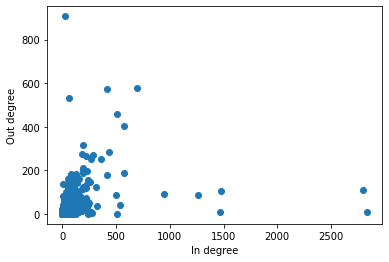

In [166]:
#Scatterplot of in- versus out-degrees 
plt.scatter(in_degree_list, out_degree_list)
plt.xlabel("In degree")
plt.ylabel("Out degree")
plt.show()

It seems like people either tend to comment alot and not recieve comments, or get lots of comments without commenting themselves. 

In [198]:
sorted_df = comments_new.sort_values(by=["author"])
unique_authors = sorted_df.author.unique()
average_scores = []
for i in range(len(unique_authors)):
    temp_author = unique_authors[i]
    temp_dataframe = sorted_df.loc[sorted_df['author'] == temp_author] #creating temporary dataframe only containing the author
    average_score = np.mean(temp_dataframe["score"])
    average_scores.append(average_score)

In [212]:
l3 = [x for x in sorted_df.author.unique() if x not in list(G.in_degree)]

In [217]:
in_degree_list2 = []
for i in range(len(list(G.in_degree()))):
    if list(G.in_degree())[i][0] not in l3:
        continue
    else:
        in_degree_list2.append(list(G.in_degree())[i][1])

31904
31904
31904
4001.0


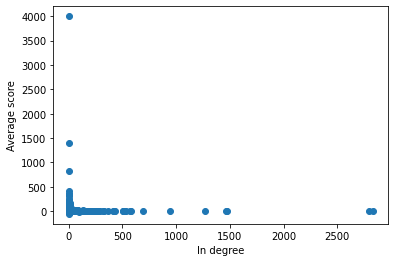

In [222]:
print(len(in_degree_list2))
print(len(average_scores))
print(len(sorted_df.author.unique()))

print(max(average_scores))
plt.scatter(in_degree_list2, average_scores)
plt.xlabel("In degree")
plt.ylabel("Average score")
plt.show()